## Vin kvalitet klassificering

Datasetet innehåller information om vin samt kvaliteten på vinet (högre siffra - bättre
kvalitet). Min uppgift är att klassificera vinet.


In [91]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Läser av datan

In [92]:
vin_df = pd.read_csv("C:/Users/danij/OneDrive/Machine Learning/Matematik/LinearRegression/Uppgift2/WineQT.csv")

In [93]:
vin_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Delar upp datan i train och test

In [96]:
x = vin_df.drop(columns=["quality", "Id"])
y = vin_df["quality"]

In [97]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.3, random_state=42)

### Data analys/kontroll

In [98]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
485,9.8,0.98,0.32,2.3,0.078,35.0,152.0,0.99800,3.25,0.48,9.4
420,9.0,0.45,0.49,2.6,0.084,21.0,75.0,0.99870,3.35,0.57,9.7
922,7.6,1.58,0.00,2.1,0.137,5.0,9.0,0.99476,3.50,0.40,10.9
809,7.0,0.22,0.30,1.8,0.065,16.0,20.0,0.99672,3.61,0.82,10.0
615,7.2,0.62,0.06,2.5,0.078,17.0,84.0,0.99746,3.51,0.53,9.7
...,...,...,...,...,...,...,...,...,...,...,...
1044,6.7,1.04,0.08,2.3,0.067,19.0,32.0,0.99648,3.52,0.57,11.0
1095,8.0,0.39,0.30,1.9,0.074,32.0,84.0,0.99717,3.39,0.61,9.0
1130,7.4,0.35,0.33,2.4,0.068,9.0,26.0,0.99470,3.36,0.60,11.9
860,7.9,0.57,0.31,2.0,0.079,10.0,79.0,0.99677,3.29,0.69,9.5


In [99]:
y_train

485     5
420     5
922     3
809     6
615     5
       ..
1044    4
1095    5
1130    6
860     6
1126    6
Name: quality, Length: 800, dtype: int64

In [100]:
x_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
158,6.8,0.610,0.04,1.5,0.057,5.0,10.0,0.99525,3.42,0.60,9.500000
1081,6.9,0.840,0.21,4.1,0.074,16.0,65.0,0.99842,3.53,0.72,9.233333
291,7.0,0.580,0.12,1.9,0.091,34.0,124.0,0.99560,3.44,0.48,10.500000
538,7.8,0.480,0.68,1.7,0.415,14.0,32.0,0.99656,3.09,1.06,9.100000
367,12.5,0.600,0.49,4.3,0.100,5.0,14.0,1.00100,3.25,0.74,11.900000
...,...,...,...,...,...,...,...,...,...,...,...
248,13.5,0.530,0.79,4.8,0.120,23.0,77.0,1.00180,3.18,0.77,13.000000
307,8.0,0.670,0.30,2.0,0.060,38.0,62.0,0.99580,3.26,0.56,10.200000
334,12.5,0.370,0.55,2.6,0.083,25.0,68.0,0.99950,3.15,0.82,10.400000
423,9.9,0.490,0.58,3.5,0.094,9.0,43.0,1.00040,3.29,0.58,9.000000


In [117]:
y_test

158     5
1081    6
291     5
538     6
367     6
       ..
248     5
307     6
334     6
423     5
843     6
Name: quality, Length: 343, dtype: int64

### Tränar random_forest

Vad får modellen för testscore? <br>
Hur många träd finns det i skogen?

In [118]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(x_train, y_train)

test_score = random_forest.score(x_test, y_test)

print("Testscore:",test_score)

Testscore: 0.6588921282798834


In [103]:
number_of_trees = random_forest.n_estimators
print(f"Totalt finns det {number_of_trees} träd i skogen.")

Totalt finns det 100 träd i skogen.


Vilka attribut har störst påverkan?

<AxesSubplot:>

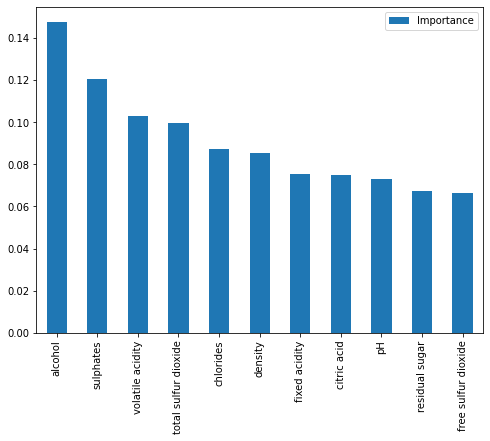

In [104]:
attribute_importance = pd.DataFrame(random_forest.feature_importances_, index = x.columns, columns=["Importance"] )
attribute_importance.sort_values(by='Importance', ascending=False, inplace=True)
attribute_importance.plot(kind='bar', figsize=(8,6))

Enligt diagramet är "Alcohol" och "sulphates" de attributerna som har störst påverkan.

#### Vilka klasser är det den modellen har störst problem med att klassificera rätt? Varför är det problem med de klasserna?

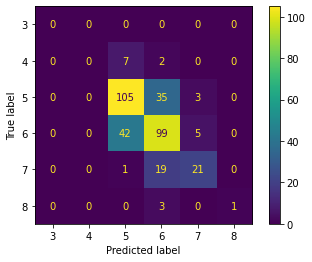

In [125]:
y_pred = random_forest.predict(x_test)
confusionMatrix = confusion_matrix(y_test, y_pred, labels=random_forest.classes_)
Matrixdisplay = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=random_forest.classes_)

Matrixdisplay.plot()
plt.show()

In [128]:
y_test.value_counts()

6    146
5    143
7     41
4      9
8      4
Name: quality, dtype: int64

Som vi kan se på confusion matrixen är klasserna 3, 4 och 8 som har jättelågt antal rätta klassifiering. 3 har då inga antal rätta/fel eftersom inga 3:or fanns med i denna test datan. Vad gäller 4:an, fanns det 9 st i testdatan och alla de klassifierades hos klasserna 5 och 6 istället. Sist har vi 8:an med 4 st i testdatan och endast 1 har klassifierats rätt medan resterande 3 st har klassifierats som klass 6. 

Vi kan dra slutsatsen att problemet med dessa fel klassifierade klasserna är att de har för lite mängd data. Exempelvis klass 6 och 5 har majoritetsvis klassifierats rätt då de har mest antal data, 146 respektive 143 st. 

In [114]:
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.metrics import accuracy_score, plot_confusion_matrix

### Bygger en egen random forest

In [142]:
decision_Trees=[['fixed acidity','citric acid'],
                ['residual sugar','chlorides','free sulfur dioxide','pH'],
                ['total sulfur dioxide','density'],
                ['sulphates','alcohol', 'volatile acidity']]

listaMedPredictions=[]

for t in decision_Trees:

    decision_tree= DecisionTreeClassifier(random_state=42)
    tree=decision_tree.fit(x_train[t],y_train)
    pred= tree.predict(x_test[t])
    listaMedPredictions.append(pred)

listaMedPredictedValues=[] 

listaMedPredictions= np.array(listaMedPredictions).transpose()

for x in listaMedPredictions:
    c=Counter(x)
    c.most_common()
    value, count = c.most_common()[0]  
    listaMedPredictedValues.append(value)


### Antal träd

In [108]:
len(decision_Trees)

4

### Jämför riktiga random_forest med egen random_forest

In [131]:
test_score_egen_random_forest= accuracy_score(y_test, listaMedPredictedValues)

print("Random_forest: ", test_score)
print("Egen Random_forest", test_score_egen_random_forest)
print(test_score- test_score_egen_random_forest)

Random_forest:  0.6588921282798834
Egen Random_forest 0.5189504373177842
0.13994169096209919


#### Skiljer den sig mot modellen du skapade i godkänt delen? I så fall, varför tror du den skiljer sig?

Resultatet skiljer sig mellan min egen och den originella random forest med 0.139. Detta kan bero på att jag har 96 st träd mindre än originella random_forest. 

C:\Users\danij\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


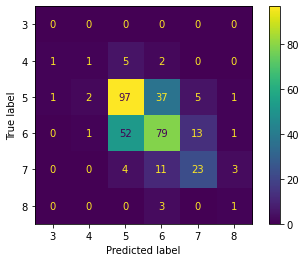

In [115]:
plot_confusion_matrix(decision_tree,x_test[t], y_test)

### Vilka klasser har modellen problem med? Är det samma klasser som för modellen i godkänt delen?

Den här modellen har problem med fortfarande samma klasser, vilka är 3, 4 och 8. Då det används samma testdata som i originella. Men det har blivit en träff på varsin klass 4 och 8. Dock det kan vara av en slump, det kommer behövas mer data för att det ska bli mer troende/rätt svar.